In [13]:
import random
import math
import logging
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import jpt
from jpt import (
    alex,
    ken,
    full_name,
    jeopardy_dialogue,
    jeopardy_benchmark_suite,
    evaluate_jeopardy_benchmarks,
    plot_evaluations
)
from util import now, TemporarySeed

In [44]:
pd.set_option('display.max_colwidth', None)

logging.basicConfig(stream=sys.stderr, level=logging.ERROR)
logger = logging.getLogger(__name__)

In [11]:
%load_ext autoreload
%autoreload 2

In [4]:
jeopardy_data = jpt.load_jeopardy_dataset(remove_unfair=True)
print(len(jeopardy_data))

206407


In [5]:
random_question = random.sample(jeopardy_data, 1)[0]
random_question

{'category': 'FOOD FOR THOUGHT',
 'air_date': '2008-11-21',
 'question': "'Buzzbee is the advertising mascot for this variety of Cheerios'",
 'value': 1000.0,
 'answer': 'Honey Nut Cheerios',
 'round': 'Jeopardy!',
 'show_number': '5570'}

In [6]:
jeopardy_dialogue(random_question, contestant=ken);

Category: FOOD FOR THOUGHT
Clue: Buzzbee is the advertising mascot for this variety of Cheerios
Answer: Honey Nut Cheerios
Contestant: What is Honey Nut Cheerios?
Alex: Correct! Honey Nut Cheerios is indeed the variety associated with Buzzbee.


In [13]:
new_benchmark_results_df = jeopardy_benchmark_suite(jeopardy_data, sample_size=1_000, seed=137)


amy....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [14]:
old_benchmark_results_df = pd.read_csv(os.path.join(jpt.JEOPARDY_DATA_DIR, 'all_benchmark_results_20240510.csv'))
all_benchmark_results_df = pd.concat([old_benchmark_results_df, new_benchmark_results_df])
all_benchmark_results_df.shape

(14000, 8)

In [15]:
jeopardy_benchmark_evaluations_df = evaluate_jeopardy_benchmarks(all_benchmark_results_df)
jeopardy_benchmark_evaluations_df

,label,successes,failures,sample_size,success_rate,standard_error,name
1,ken,1924,76,2000,0.9620,0.004288,Ken Jennings\n(gpt-4-turbo)
0,amy,1856,144,2000,0.9280,0.005788,Amy Schneider\n(gpt-3.5-fine-tuned)
5,james,1791,209,2000,0.8955,0.006846,James Holzhauer\n(gpt-3.5-turbo)
4,brad,1790,210,2000,0.8950,0.006860,Brad Rutter\n(llama3:70b)
6,mattea,1748,252,2000,0.8740,0.007425,Mattea Roach\n(llama3:8b + RAG)
2,larissa,1257,743,2000,0.6285,0.010805,Larissa Kelly\n(llama3:8b)
3,david,1196,804,2000,0.5980,0.010964,David Madden\n(llama2:7b)


In [ ]:
all_benchmark_results_df = pd.read_csv(os.path.join(jpt.JEOPARDY_DATA_DIR, r'all_benchmark_results_2024-05-11.csv'))

In [49]:
errors_df = all_benchmark_results_df[ ~all_benchmark_results_df['correct'] & (all_benchmark_results_df['label'] == 'ken') ]
errors_df.sample(len(errors_df)).head(10)

,label,category,question,value,answer,contestant_answer,judgement,correct
8221,ken,ASTRONOMY ADD A LETTER,'Add this letter to star & get something harsh or grim',1000.0,K (stark),"What is ""T""? (Star + T = Start)","Incorrect. The correct response was ""What is K?"" to form the word ""stark.""",False
352,ken,"""WIN""","'Seen here, Marie Barrow is holding this possession of her late brother Clyde'",400.0,Winchester rifle,What is a gun?,"Incorrect. The correct response is ""What is a Winchester rifle?""",False
317,ken,"YOU MOVE, TO FAST","'Move to the adobe dwellings of these southwest Indians & ritual fasters whose name means ""village""'",600.0,the Pueblos,What are the Hopi?,"Incorrect. The correct response is ""Who are the Pueblos?""",False
8833,ken,TECH COMPANIES?,"'In 2007 President Bush said he'd do this ""to the finish...that's one way to ensure that I am relevant""'",1000.0,sprint,What is veto?,"Incorrect. The correct response was ""What is sprint?""",False
8540,ken,A BROAD-BASED MOVEMENT,'The YWCA',400.0,Young Women\'s Christian Association,What is feminism?,"Incorrect. The correct response was ""What is the Young Women's Christian Association?""",False
2548,ken,"""SWEET"" CHARITY",'Villanova's Mendel Medal depicts the school's seal encircled by a wreath of these',1000.0,sweet peas,What are sugar maples?,"Incorrect. The correct response was ""What are sweet peas?""",False
8559,ken,AIRLINE AD SLOGANS,"'""We have to earn our wings every day""'",1600.0,Eastern,What is American Airlines?,"Incorrect. The correct response was ""What is Eastern?""",False
465,ken,"""FIELD"" OF DREAMS",'Binoculars',400.0,field glasses,What is a field of vision?,"Incorrect. The correct response was ""What are field glasses?""",False
2354,ken,SWING TIME!,"'This ""Contender"" band has fought with a cola company to keep its name'",200.0,Royal Crown Revue,What is The New York Dolls?,"Incorrect. The correct response was ""What is Royal Crown Revue?""",False
8693,ken,HIRSCHFELD,'Hirschfeld showed this silent movie comedian in his most famous moment',500.0,Harold Lloyd,Who is Charlie Chaplin?,"Incorrect. The correct response was ""Who is Harold Lloyd?""",False


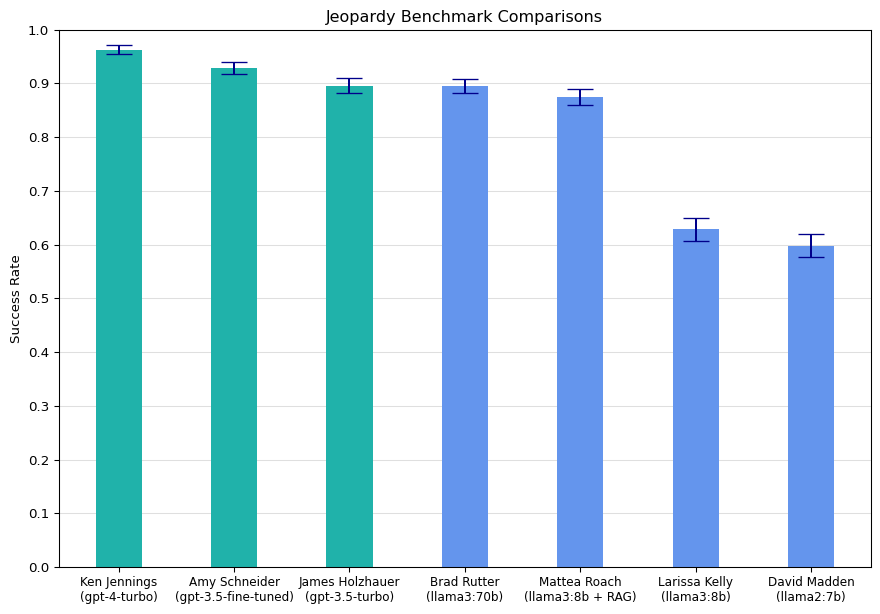

In [40]:
# Plotting the bar chart with error bars
jpt.plot_evaluations(jeopardy_benchmark_evaluations_df)

In [18]:
timestamp = now(False)
eval_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'jeopardy_benchmark_evaluations_{timestamp}.csv')
print('wrote', eval_filename)
jeopardy_benchmark_evaluations_df.to_csv(eval_filename, index=False)

benchmark_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'all_benchmark_results_{timestamp}.csv')
all_benchmark_results_df.to_csv(benchmark_filename, index=False)
print('wrote', benchmark_filename)

wrote C:\Users\oloon\Dropbox\data\jeopardy\jeopardy_benchmark_evaluations_2024-05-11.csv
wrote C:\Users\oloon\Dropbox\data\jeopardy\all_benchmark_results_2024-05-11.csv
